<a href="https://colab.research.google.com/github/Benashael/Movie-Rating-Prediction-with-Python/blob/main/Movie_Rating_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessities**

**Importing Libraries**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

**Loading the Data**

In [67]:
df = pd.read_csv("/content/IMDb-Movies-India.csv", encoding='latin1')

# **Exploratory Data Analysis (EDA)**

**Viewing Data**

In [42]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [43]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [44]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**Visualizing Data**

<Axes: title={'center': 'Average Rating by Year'}, xlabel='Year'>

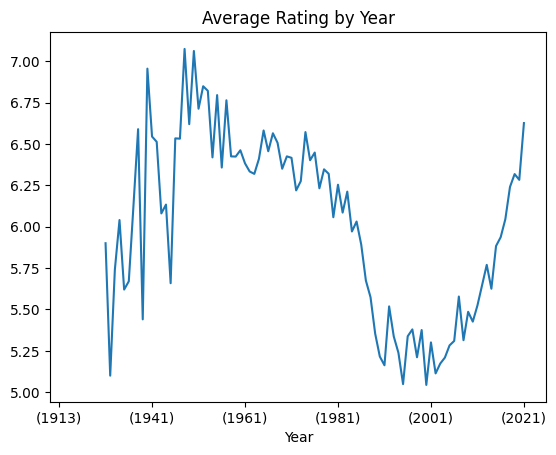

In [46]:
plt.title('Average Rating by Year')
df.groupby('Year')['Rating'].mean().plot()

<Axes: title={'center': 'Duration Vs Rating'}, xlabel='Rating', ylabel='Duration'>

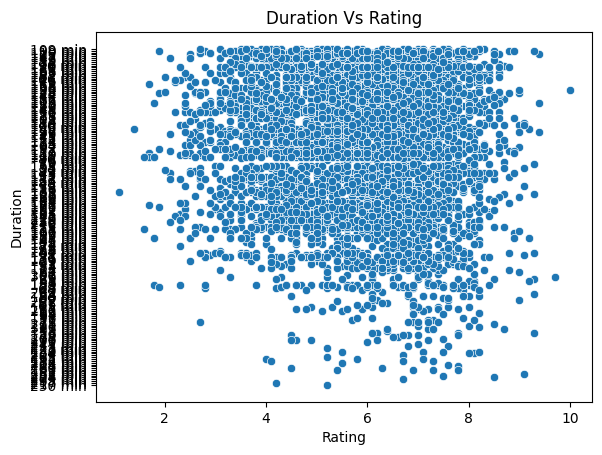

In [50]:
plt.title("Duration Vs Rating")
sns.scatterplot(y="Duration",x="Rating",data=df)

<Axes: title={'center': 'Votes Vs Rating'}, xlabel='Rating', ylabel='Votes'>

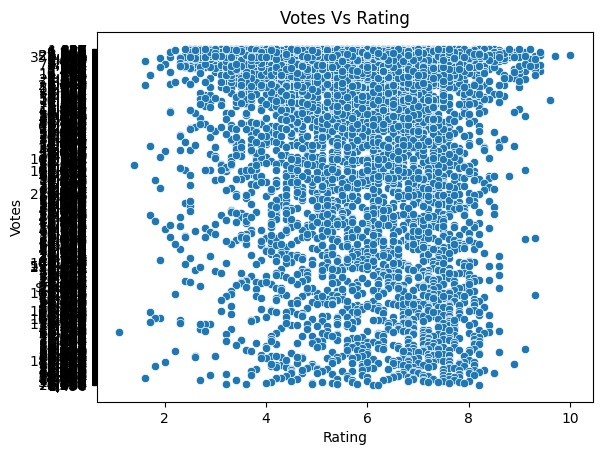

In [49]:
plt.title("Votes Vs Rating")
sns.scatterplot(y="Votes",x="Rating",data=df)

**Statistical Analysis**

In [51]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [52]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [53]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [54]:
# For Numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7919.0,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0


In [55]:
# For Categorical Data
df.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [56]:
df["Year"].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [57]:
df["Duration"].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [58]:
df["Votes"].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

# **Data Preprocessing**

**Handling Duplicate Values**

In [68]:
df.drop_duplicates(inplace=True)

**Handling Missing Values**

In [69]:
df.dropna(inplace=True)

**Data Cleaning**

In [70]:
df["Year"]=df["Year"].str.strip("()").astype(int)
df["Duration"]=df["Duration"].str.replace(" min","").astype(int)
df["Votes"]=df["Votes"].str.replace(",","").astype(int)

**Encoding Categorical Features**

Target Encoding has been used because of more unique values.

In [71]:
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

**Feature Selection**

In [72]:
df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)

In [73]:
df.drop("Name",axis=1,inplace=True)

In [74]:
df.drop("Duration",axis=1,inplace=True)

<Axes: >

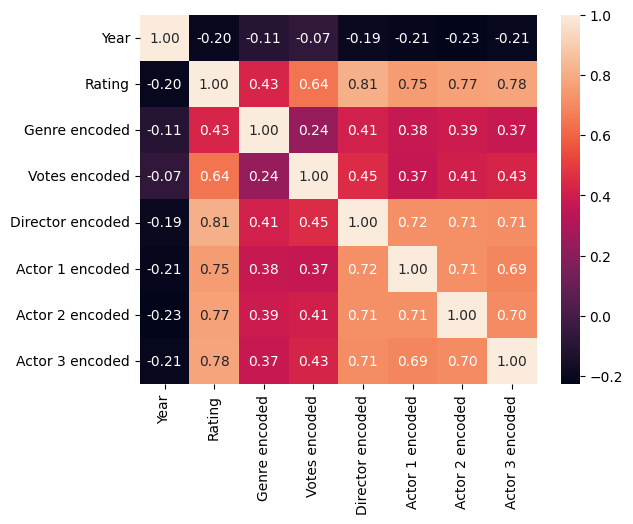

In [76]:
sns.heatmap(df.corr(),fmt=".2f",annot=True)

**Splitting the Dataset into Features and Target**

In [77]:
X = df.drop("Rating",axis=1)
y = df["Rating"]

In [78]:
X

,Year,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
1,2019,6.4,5.6,7.0,6.8,7.0,7.0
3,2019,5.7,5.6,4.4,5.4,4.4,4.4
5,1997,6.2,4.8,5.3,4.8,5.8,5.9
6,2005,6.8,7.4,7.4,5.4,6.9,6.5
8,2012,5.5,6.6,5.6,5.6,5.9,5.6
...,...,...,...,...,...,...,...
15493,2015,6.4,6.1,6.1,6.7,6.1,5.8
15494,2001,7.0,6.2,7.2,4.2,5.8,6.0
15503,1989,5.7,5.9,6.3,6.3,5.8,6.0
15505,1999,5.5,5.9,5.2,5.5,4.6,5.7


In [79]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

**Splitting the Dataset into Training and Testing sets**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

**Linear Regression**

In [81]:
# Training
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [82]:
# Evaluation
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.3142014162213455


**Support Vector Machine (SVM)**

In [83]:
# Training
SVM = SVR()
SVM.fit(X_train, y_train)

SVR()

In [84]:
# Evaluation
y_pred = SVM.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  1.790603967716199


**Decision Tree**

In [85]:
# Training
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
# Evaluation
y_pred = DT.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.49059187279151933


**K - Nearest Neighbors (KNN)**

In [87]:
# Training
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [88]:
# Evaluation
y_pred = KNN.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.3514734982332156


**Random Forest**

In [89]:
# Training
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
# Evaluation
y_pred = RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.2548860318021201


**Model with Good Performance: Random Forest, Linear Regression, K - Nearest Neighbors**